In [363]:
import random
import matplotlib.pyplot as pl
import numpy as np
import scipy.stats as stats
import math

class Player:
    
    def __init__(self):
        self.coin_count = 3
        self.player_number = 0
        self.player_out = False
        self.left = None
        self.right = None
        
    def roll_dice(self):
        max_count = 3
        if self.coin_count <= 0:
            self.player_out = True
            return -1
        elif self.coin_count < 3 and self.coin_count > 0:
            max_count = self.coin_count
        
        for x in range(0, max_count):
            dice_roll = random.randint(1, 6)
            if dice_roll == 1:
                self.coin_count -= 1
            elif dice_roll == 2:
                self.coin_count -= 1
                self.left.coin_count += 1
            elif dice_roll == 3:
                self.coin_count -= 1
                self.right.coin_count += 1
            else:
                pass
        
        if self.coin_count == 0:
            self.player_out = True
            return 0
        else:
            self.player_out = False
            return 1
        
class Game:
    
    def __init__(self):
        self.players_out = 0
        self.turns = 0
        self.player_up = None
        self.player_count = 0
        
    def initiate_players(self, player_count):
        self.player_count = player_count
        player_one = Player()
        for x in range(0, player_count):
            if x == 0:
                self.player_up = player_one
                self.player_up.player_number = x
            elif x > 0 and x < player_count -1:
                new_player = Player()
                self.player_up.right = new_player
                current_player = self.player_up
                self.player_up = self.player_up.right
                self.player_up.left = current_player
                self.player_up.player_number = x
            else:
                new_player = Player()
                self.player_up.right = new_player
                current_player = self.player_up
                self.player_up = self.player_up.right
                self.player_up.player_number = x
                self.player_up.left = current_player
                self.player_up.right = player_one
                player_one.left = self.player_up
                self.player_up = self.player_up.right
                
    def play(self):
        
        while self.players_out != self.player_count -1:
            turn = self.player_up.roll_dice()
            if turn == 1:
                self.player_up = self.player_up.right
                self.players_out = 0
                self.turns += 1
            else:
                self.player_up = self.player_up.right
                self.players_out += 1
                self.turns += 1
                
                
            
        
def statistical_breakdown(games, player_count):
    games = sorted(games)
    fit = stats.norm.pdf(games, np.mean(games), np.std(games))  #this is a fitting indeed

    pl.plot(games,fit,'-o')

    pl.hist(games,density=True)      #use this to draw histogram of your data

    pl.show()  
    print("Average turns in " + str(len(games)) + " games for " + str(player_count) + " players is: " + str(np.mean(games)))
    
def analyze(player_count, games_to_play):
    games = []
    for x in range(0,games_to_play):
        game = Game()
        game.initiate_players(player_count)
        game.play()
        games.append(game.turns)
    statistical_breakdown(games, player_count)

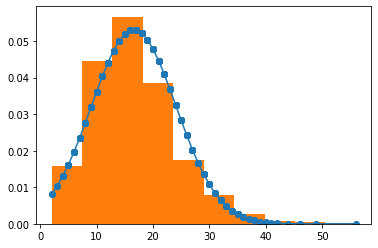

Average turns in 1000 games for 3 players is: 16.576


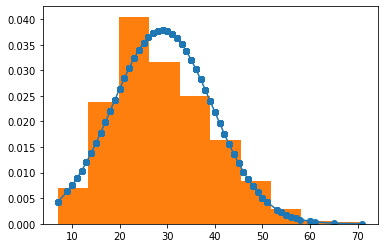

Average turns in 1000 games for 4 players is: 28.933


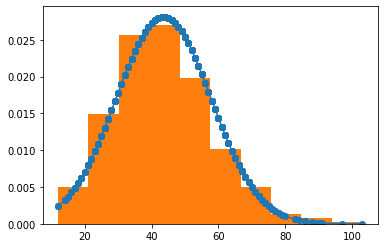

Average turns in 1000 games for 5 players is: 43.55


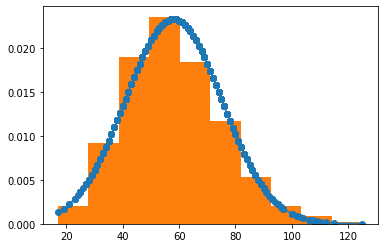

Average turns in 1000 games for 6 players is: 57.985


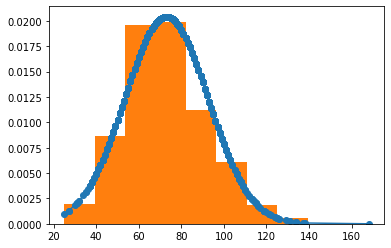

Average turns in 1000 games for 7 players is: 72.92


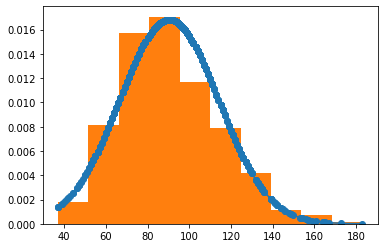

Average turns in 1000 games for 8 players is: 90.29


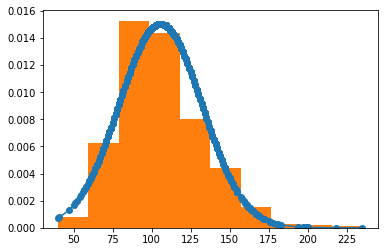

Average turns in 1000 games for 9 players is: 105.587


In [355]:
for x in range(3,10):
    analyze(x,1000)

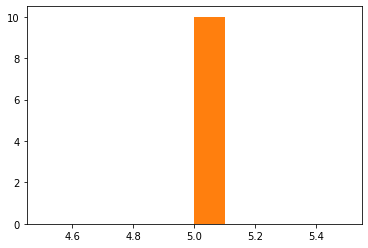

Average turns in 1 games for 2 players is: 5.0


In [362]:
analyze(2, 1)